#Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BEED_Data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      8000 non-null   int64
 1   X2      8000 non-null   int64
 2   X3      8000 non-null   int64
 3   X4      8000 non-null   int64
 4   X5      8000 non-null   int64
 5   X6      8000 non-null   int64
 6   X7      8000 non-null   int64
 7   X8      8000 non-null   int64
 8   X9      8000 non-null   int64
 9   X10     8000 non-null   int64
 10  X11     8000 non-null   int64
 11  X12     8000 non-null   int64
 12  X13     8000 non-null   int64
 13  X14     8000 non-null   int64
 14  X15     8000 non-null   int64
 15  X16     8000 non-null   int64
 16  y       8000 non-null   int64
dtypes: int64(17)
memory usage: 1.0 MB


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score, confusion_matrix
import joblib

In [ ]:
X = df.drop("y", axis=1)
y = df["y"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Random Forest

In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9675

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       0.98      0.97      0.98       400
           2       0.94      0.96      0.95       400
           3       0.95      0.94      0.95       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


Confusion Matrix:
[[397   2   0   1]
 [  0 390   5   5]
 [  0   3 383  14]
 [  0   4  18 378]]


#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    objective='multi:softmax',   # for multi-class classification
    num_class=len(np.unique(y)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [ ]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:37:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=4, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print("\n===== XGBoost Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


===== XGBoost Results =====
Accuracy: 0.971875

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       400
           1       0.98      0.97      0.98       400
           2       0.96      0.96      0.96       400
           3       0.95      0.96      0.96       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


Confusion Matrix:
[[397   2   0   1]
 [  1 388   4   7]
 [  0   3 384  13]
 [  0   1  13 386]]


#Lightgbm


In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
lgb_model = LGBMClassifier(
    n_estimators=300,
    max_depth=-1,
    learning_rate=0.1,
    objective='multiclass',
    num_class=len(np.unique(y)),
    random_state=42
)

In [ ]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3165
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 16
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

LGBMClassifier(n_estimators=300, num_class=4, objective='multiclass',
               random_state=42)

In [ ]:
y_pred_lgb = lgb_model.predict(X_test)

print("\n===== LightGBM Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



===== LightGBM Results =====
Accuracy: 0.983125

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       0.99      0.98      0.99       400
           2       0.98      0.97      0.97       400
           3       0.96      0.99      0.98       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Confusion Matrix:
[[398   2   0   0]
 [  0 393   4   3]
 [  0   1 387  12]
 [  0   0   5 395]]


#CatBoost

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
cat_model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

In [ ]:
cat_model.fit(X_train, y_train)

In [ ]:
y_pred_cat = cat_model.predict(X_test)

print("\n===== CatBoost Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cat))



===== CatBoost Results =====
Accuracy: 0.955

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       0.97      0.95      0.96       400
           2       0.92      0.94      0.93       400
           3       0.93      0.93      0.93       400

    accuracy                           0.95      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.95      0.96      1600


Confusion Matrix:
[[398   2   0   0]
 [  0 382   8  10]
 [  0   4 378  18]
 [  0   5  25 370]]


#ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
num_classes = y.nunique()

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


In [ ]:
ann_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = ann_model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4553 - loss: 1.0750 - val_accuracy: 0.7633 - val_loss: 0.5234
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7780 - loss: 0.5233 - val_accuracy: 0.8227 - val_loss: 0.3912
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8218 - loss: 0.4080 - val_accuracy: 0.8680 - val_loss: 0.3142
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8626 - loss: 0.3367 - val_accuracy: 0.8805 - val_loss: 0.2894
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8705 - loss: 0.3096 - val_accuracy: 0.8836 - val_loss: 0.2727
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8787 - loss: 0.2906 - val_accuracy: 0.8906 - val_loss: 0.2635
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8868 - loss: 0.2682 - val_accuracy: 0.9039 - val_loss: 0.2334
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9069 - loss: 0.2439 - val_accuracy: 

In [ ]:
y_pred_ann_prob = ann_model.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann_prob, axis=1)

print("\n===== ANN Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

===== ANN Results =====
Accuracy: 0.98125

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.99      0.97      0.98       400
           2       0.96      0.98      0.97       400
           3       0.97      0.98      0.97       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600


Confusion Matrix:
[[399   0   0   1]
 [  0 388   6   6]
 [  0   3 392   5]
 [  0   0   9 391]]


#CNN

In [ ]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
num_classes = y.nunique()
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu',
           input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn_model.fit(
    X_train_cnn, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4714 - loss: 1.0251 - val_accuracy: 0.6805 - val_loss: 0.6752
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7078 - loss: 0.6408 - val_accuracy: 0.7680 - val_loss: 0.5398
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7716 - loss: 0.5237 - val_accuracy: 0.7852 - val_loss: 0.4842
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7969 - loss: 0.4660 - val_accuracy: 0.8008 - val_loss: 0.4599
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8274 - loss: 0.3977 - val_accuracy: 0.8211 - val_loss: 0.4060
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8409 - loss: 0.3812 - val_accuracy: 0.8492 - val_loss: 0.3778
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8641 - loss: 0.3443 - val_accuracy: 0.8461 - val_loss: 0.3683
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8755 - loss: 0.3036 - val_accuracy: 0

In [ ]:
y_pred_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_prob, axis=1)

print("\n===== CNN Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))
print(classification_report(y_test, y_pred_cnn))
print(confusion_matrix(y_test, y_pred_cnn))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

===== CNN Results =====
Accuracy: 0.948125
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       400
           1       0.96      0.96      0.96       400
           2       0.90      0.95      0.92       400
           3       0.94      0.88      0.91       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

[[398   1   0   1]
 [  0 386   6   8]
 [  0   8 380  12]
 [  0   9  38 353]]


In [ ]:
models = {
    "RandomForest": model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model,
    "ANN": ann_model,
    "CNN": cnn_model
}

print("\n===== Model Comparison =====")

for name, m in models.items():

    if name == "ANN":
        y_pred_prob = m.predict(X_test)
        y_pred_temp = np.argmax(y_pred_prob, axis=1)

    elif name == "CNN":
        y_pred_prob = m.predict(X_test_cnn)
        y_pred_temp = np.argmax(y_pred_prob, axis=1)

    else:
        y_pred_temp = m.predict(X_test)

    acc = accuracy_score(y_test, y_pred_temp)
    f1 = f1_score(y_test, y_pred_temp, average='macro')

    print(f"{name}: Accuracy = {acc:.4f} | F1_macro = {f1:.4f}")



===== Model Comparison =====
RandomForest: Accuracy = 0.9675 | F1_macro = 0.9675
XGBoost: Accuracy = 0.9719 | F1_macro = 0.9719


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: Accuracy = 0.9831 | F1_macro = 0.9832
CatBoost: Accuracy = 0.9550 | F1_macro = 0.9551
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN: Accuracy = 0.9812 | F1_macro = 0.9813
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
CNN: Accuracy = 0.9481 | F1_macro = 0.9480


In [ ]:
results = {}
for name, m in models.items():

    if name == "ANN":
        y_pred = np.argmax(m.predict(X_test), axis=1)
    elif name == "CNN":
        y_pred = np.argmax(m.predict(X_test_cnn), axis=1)
    else:
        y_pred = m.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_macro": f1_score(y_test, y_pred, average='macro')
    }

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


# Model dumping

In [ ]:
import os
save_path = "/content/drive/MyDrive/Colab Notebooks/eeg_models/"
os.makedirs(save_path, exist_ok=True)
joblib.dump(model, save_path + "random_forest.pkl")
joblib.dump(xgb_model, save_path + "xgboost.pkl")
joblib.dump(lgb_model, save_path + "lightgbm.pkl")
cat_model.save_model(save_path + "catboost.cbm")
ann_model.save(save_path + "ann_model.h5")
cnn_model.save(save_path + "cnn_model.h5")
joblib.dump(scaler, save_path + "scaler.pkl")


['/content/drive/MyDrive/Colab Notebooks/eeg_models/scaler.pkl']

#Model comparison

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

              Accuracy  F1_macro
RandomForest  0.967500  0.967549
XGBoost       0.971875  0.971937
LightGBM      0.983125  0.983150
CatBoost      0.955000  0.955106
ANN           0.981250  0.981283
CNN           0.948125  0.948042


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve, auc
import numpy as np

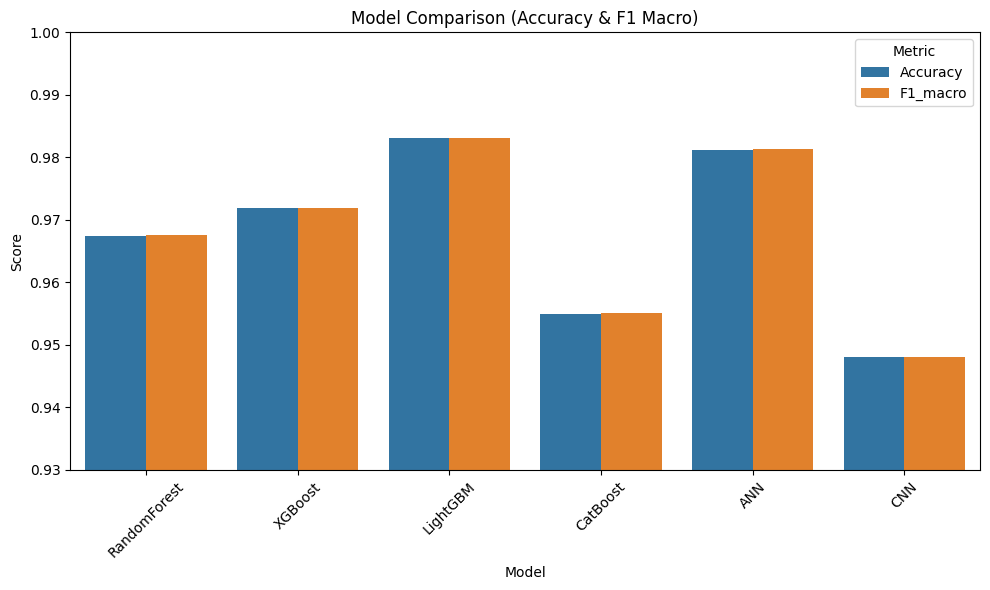

In [ ]:
results_melted = results_df.reset_index().melt(
    id_vars="index",
    var_name="Metric",
    value_name="Score"
)

results_melted.rename(columns={"index": "Model"}, inplace=True)

plt.figure(figsize=(10,6))

sns.barplot(data=results_melted,
            x="Model",
            y="Score",
            hue="Metric")

plt.title("Model Comparison (Accuracy & F1 Macro)")
plt.xticks(rotation=45)
plt.ylim(0.93, 1.0)
plt.tight_layout()

plt.show()



#ROC

In [ ]:
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)


In [ ]:
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

roc_data = {}

roc_data["RandomForest"] = model.predict_proba(X_test)
roc_data["XGBoost"] = xgb_model.predict_proba(X_test)
roc_data["LightGBM"] = lgb_model.predict_proba(X_test)
roc_data["CatBoost"] = cat_model.predict_proba(X_test)
roc_data["ANN"] = ann_model.predict(X_test)
roc_data["CNN"] = cnn_model.predict(X_test_cnn)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


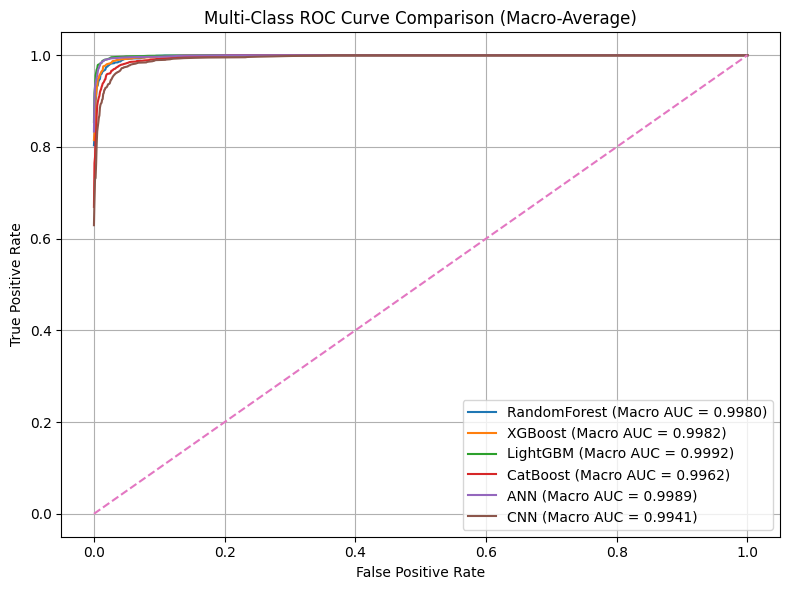

In [ ]:
plt.figure(figsize=(8,6))

for name, y_prob in roc_data.items():

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr,
             label=f"{name} (Macro AUC = {macro_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--')

plt.title("Multi-Class ROC Curve Comparison (Macro-Average)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



In [ ]:
print(np.unique(y))

[0 1 2 3]


#Confusion Matrix

In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure()
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues')

    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Confusion Matrix - LightGBM


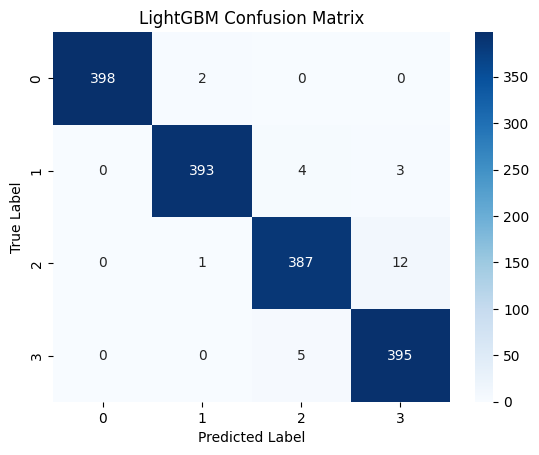

In [ ]:
print("Confusion Matrix - LightGBM")
plot_conf_matrix(y_test, y_pred_lgb, "LightGBM Confusion Matrix")

Confusion Matrix - ANN


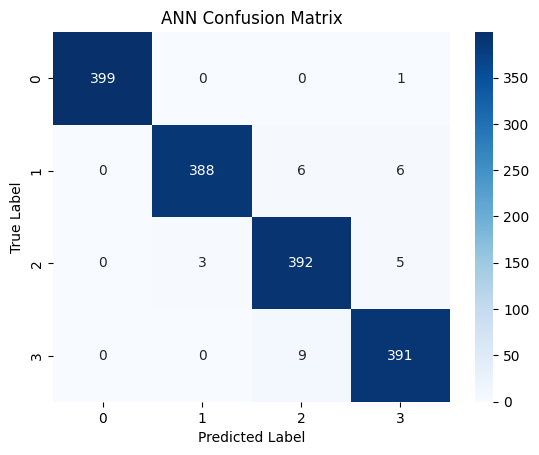

In [ ]:
print("Confusion Matrix - ANN")
plot_conf_matrix(y_test, y_pred_ann, "ANN Confusion Matrix")

Confusion Matrix - XGBoost


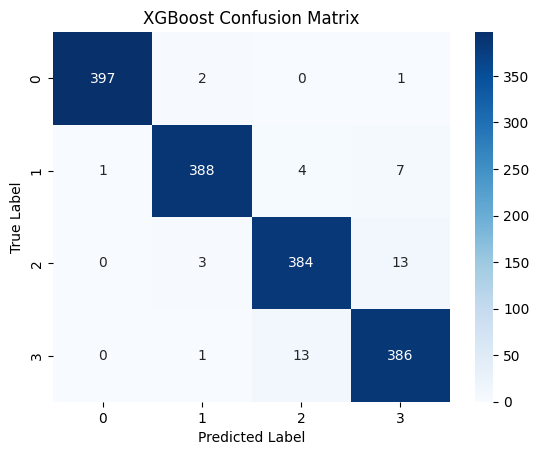

In [ ]:
print("Confusion Matrix - XGBoost")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")

Confusion Matrix - CNN


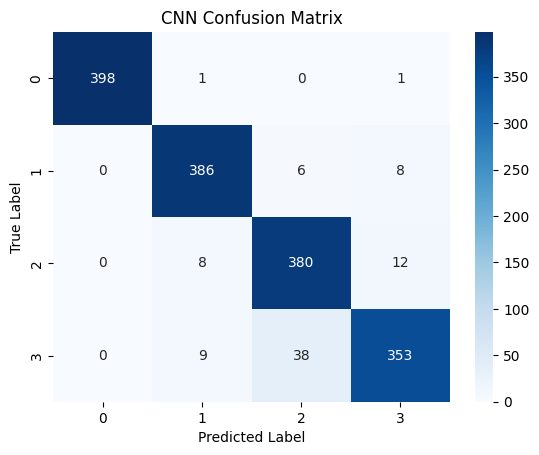

In [ ]:
print("Confusion Matrix - CNN")
plot_conf_matrix(y_test, y_pred_cnn, "CNN Confusion Matrix")

#Top Important features

In [ ]:
importance = lgb_model.feature_importances_
feature_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

print(feature_df)

   Feature  Importance
4       X5        2404
5       X6        2225
6       X7        2223
7       X8        2218
15     X16        2140
11     X12        2106
2       X3        2097
3       X4        2092
10     X11        1981
8       X9        1954
12     X13        1899
0       X1        1844
14     X15        1800
13     X14        1793
1       X2        1754
9      X10        1689


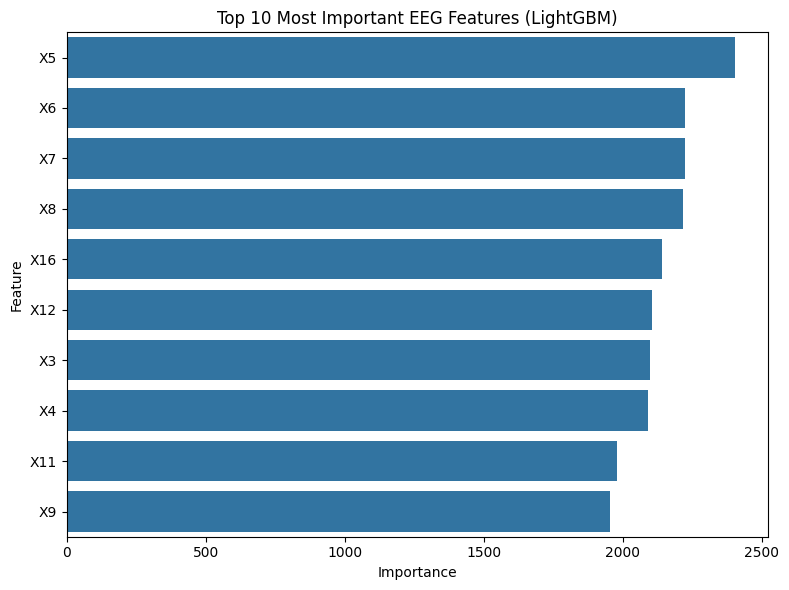

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=feature_df.head(10),
    x="Importance",
    y="Feature"
)

plt.title("Top 10 Most Important EEG Features (LightGBM)")
plt.tight_layout()
plt.show()
